In [2]:
from datetime import datetime
import ccxt
import json
import numpy as np
import pandas as pd
from apscheduler.schedulers.blocking import BlockingScheduler

In [3]:
credentials ={
            "apiKey":"62a05a9ccf9fd60001e2ff9e",
            "secret":"578687f6-5420-46d7-9b7a-26a737713cfb",
            "password":"3FiF$4sR6p5Y9fPnSNijL?HaGcd@A7"
}
session = ccxt.kucoin(credentials)

In [4]:
order_books = session.fetch_order_book('BTC/USDT',100)

bids = np.array(order_books['bids'])
asks = np.array(order_books['asks'])

OB_df = pd.DataFrame({'bids_price':bids[:,0],
                    'asks_price':asks[:len(bids[:,0]),0],
                        'bids_amount':bids[:,1],
                        'asks_amount':asks[:len(bids[:,0]),1],
                        'bids_volume':bids[:,1]*bids[:,0],
                        'asks_volume':asks[:len(bids[:,0]),1]*asks[:len(bids[:,0]),0],
            },
            dtype=float)
OB_df.head()

,bids_price,asks_price,bids_amount,asks_amount,bids_volume,asks_volume
0,19522.6,19522.7,1.455885,1.238114,28422.663820,24171.337168
1,19521.7,19523.1,0.155820,0.000605,3041.871294,11.814014
2,19521.6,19523.6,0.379567,0.023193,7409.760808,452.814955
3,19521.4,19524.6,2.079098,0.000233,40586.897450,4.543960
4,19521.3,19524.7,0.500000,0.004660,9760.650000,90.985102


/home/baptiste/windowsdisk/_sharedFS/Python/python-trading-bot/venv/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


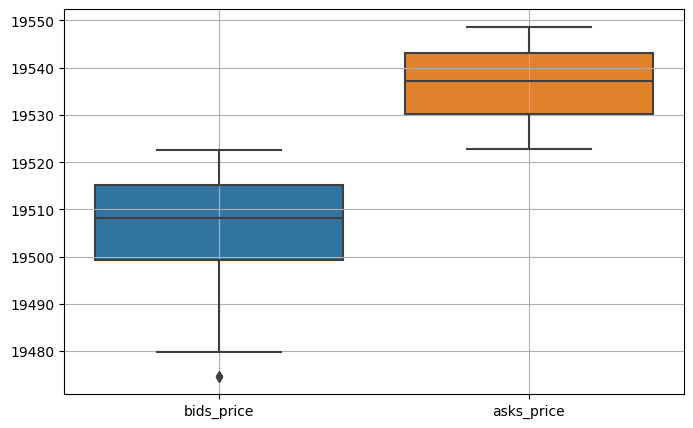

,bids_price,asks_price,bids_amount,asks_amount,bids_volume,asks_volume
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,19506.298000,19536.531000,0.588945,0.319863,11486.400723,6248.562811
std,11.644871,7.420429,0.956799,0.459729,18656.955496,8980.985632
min,19474.600000,19522.700000,0.000030,0.000037,0.585156,0.721336
25%,19499.325000,19530.150000,0.092158,0.006349,1797.964671,124.073163
50%,19508.200000,19537.150000,0.186850,0.188500,3644.985805,3681.800850
75%,19515.150000,19543.025000,0.651838,0.401927,12720.939475,7853.114164
max,19522.600000,19548.700000,5.955000,2.955862,116093.320500,57754.588790


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(8, 5))

sns.boxplot(data=OB_df[['bids_price','asks_price']], ax=ax)

plt.grid()
plt.show()
OB_df.describe()

In [ ]:
def cycle():
    order_books = session.fetch_order_book('BTC/USDT',100)

    bids = np.array(order_books['bids'])
    asks = np.array(order_books['asks'])

    OB_df = pd.DataFrame({'bids_price':bids[:,0],
                        'asks_price':asks[:len(bids[:,0]),0],
                            'bids_amount':bids[:,1],
                            'asks_amount':asks[:len(bids[:,0]),1],
                            'bids_volume':bids[:,1]*bids[:,0],
                            'asks_volume':asks[:len(bids[:,0]),1]*asks[:len(bids[:,0]),0],
                },
                dtype=float)
    OB_df.head()

    print(f'DIFFERENCE (ask - bid) mean : {OB_df.asks_price.mean()- OB_df.bids_price.mean()} $')
    print(f'ASK mean : {OB_df.asks_price.mean()}')
    print(f'QTY DIFFERENCE : {OB_df.bids_amount.mean()-OB_df.asks_amount.mean()}')

    print(f'DIFFERENCE (ask - bid) median : {OB_df.asks_price.median()- OB_df.bids_price.median()} $')
    # spread == difference
    # more spread meaning low liquidity; slow time for price action
    # less spread meaning higher liquidity; faster price action
    print('==================================================================================================')
    total_vol_ask = OB_df['asks_volume'].sum()
    total_vol_bid = OB_df['bids_volume'].sum()
    #
    if total_vol_ask > total_vol_bid:
        print('CURRENT OB BOOKED AT SELLING')
        print('SELLING BOOKED VOLUME: ', total_vol_ask)
        print('BUYING BOOKED VOLUME: ', total_vol_bid)
        print('==================================================================================================')
    elif total_vol_bid > total_vol_ask:
        print('CURRENT OB BOOKED AT BUYING')
        print('BUYING BOOKED VOLUME: ', total_vol_bid)
        print('SELLING BOOKED VOLUME: ', total_vol_ask)
        print('==================================================================================================')
    elif total_vol_bid == total_vol_ask:
        print('CURRENT OB BOOKED AT NEURAL')
        print('BUYING BOOKED VOLUME: ', total_vol_bid)
        print('SELLING BOOKED VOLUME: ', total_vol_ask)
        print('==================================================================================================')


scheduler = BlockingScheduler()        
scheduler.add_job(cycle, trigger='cron', minute='*',)
scheduler.start()